In [1]:
import pandas as pd

# # 최대 행 수를 None으로 설정하여 모든 행이 출력되도록 함
# pd.set_option('display.max_rows', None)

# # 최대 열 수를 None으로 설정하여 모든 열이 출력되도록 함
# pd.set_option('display.max_columns', None)

# # 행과 열의 출력 옵션을 원래 상태로 되돌림
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

In [2]:
FILE_PATH = '.tmp/dataset/train_set.csv'
data = pd.read_csv(FILE_PATH)

data

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,AMT_APPLICATION_MAX,AMT_APPLICATION_SUM,AMT_APPLICATION_MEAN,RATE_DOWN_PAYMENT_MEAN,IS_REVOLVING_LOAN,Dependents_Index,Income_to_Dependents_Ratio,Debt_to_Income_Ratio,Debt_Repayment_Capability_Index,Credit_Utilization_Ratio
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,179055.0,179055.0,179055.000000,0.000000,0.0,0.0,202500.0,1.213733,0.045688,0.604482
1,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,24282.0,24282.0,24282.000000,0.212008,0.0,0.0,67500.0,0.000000,0.079367,0.000000
2,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,...,450000.0,778509.0,155701.800000,0.073051,0.0,0.0,99000.0,2.424818,0.639988,0.489417
3,100009,0,1,171000.0,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,...,110160.0,537192.0,76741.714286,0.126602,0.0,0.5,85500.0,6.300289,0.411461,0.690287
4,100010,0,0,360000.0,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,...,247212.0,247212.0,247212.000000,0.000000,0.0,0.0,360000.0,0.966688,0.076287,0.227456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244275,456247,0,0,112500.0,345510.0,17770.5,247500.0,0.022800,-11870,-399,...,99225.0,299164.5,59832.900000,0.041019,0.0,0.0,112500.0,19.496800,0.759637,6.348268
244276,456249,0,0,112500.0,225000.0,22050.0,225000.0,0.022800,-24384,365243,...,180000.0,294210.0,147105.000000,0.000000,0.0,0.0,112500.0,1.449520,0.304604,0.724760
244277,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,28912.5,48325.5,24162.750000,0.214316,0.0,0.0,153000.0,11.737471,1.206858,2.650035
244278,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,223789.5,242635.5,121317.750000,0.000000,0.0,0.0,171000.0,0.000000,0.124926,0.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244280 entries, 0 to 244279
Columns: 140 entries, SK_ID_CURR to Credit_Utilization_Ratio
dtypes: float64(63), int64(77)
memory usage: 260.9 MB


# import Library

In [4]:
import pandas as pd  # 데이터 프레임을 다루기 위한 pandas 라이브러리
from sklearn.model_selection import train_test_split  # 데이터셋을 학습용과 검증용으로 나누기 위한 함수
from sklearn.preprocessing import StandardScaler  # 데이터 스케일링을 위한 StandardScaler
from sklearn.metrics import (
    roc_auc_score, accuracy_score, confusion_matrix, 
    precision_score, recall_score, f1_score, roc_curve  # 모델 성능 평가를 위한 함수들
)
import seaborn as sns  # 시각화를 위한 Seaborn 라이브러리
import matplotlib.pyplot as plt  # 시각화를 위한 Matplotlib 라이브러리



from sklearn.linear_model import LogisticRegression  # 로지스틱 회귀 모델
from sklearn.ensemble import RandomForestClassifier  # 랜덤 포레스트 분류 모델
from xgboost import XGBClassifier  # XGBoost 분류 모델
from lightgbm import LGBMClassifier  # LightGBM 분류 모델
from catboost import CatBoostClassifier  # CatBoost 분류 모델
from sklearn.neural_network import MLPClassifier  # MLP (다층 퍼셉트론) 분류 모델

# 데이터 처리 및 모델 학습 모듈화

> load_and_split_data: 데이터 로드와 학습/테스트 분할.

> scale_data: 학습 데이터와 테스트 데이터 스케일링.

> train_and_evaluate_model: 모델 학습 및 예측.

> evaluate_performance: 성능 지표 계산.

> plot_roc_curve: ROC-AUC 그래프 시각화.

> plot_confusion_matrix: 혼동 행렬 시각화.

> plot_feature_importance: 피처 중요도 시각화.

> run_model_pipeline 함수로 하나의 모델 실행 과정을 전체적으로 처리.

In [5]:
# 데이터 로드 및 분할 함수
def load_and_split_data(file_path, target_column='TARGET', test_size=0.3, random_state=42):
    data = pd.read_csv(file_path)
    X = data.drop(columns=[target_column])
    y = data[target_column]
    return train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)


# 데이터 스케일링 함수
def scale_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled


# 모델 학습 및 예측 함수
def train_and_evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test):
    model.fit(X_train_scaled, y_train)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    y_pred = model.predict(X_test_scaled)
    return y_pred, y_pred_proba


# 성능 평가 함수
def evaluate_performance(y_test, y_pred, y_pred_proba):
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"AUC: {roc_auc:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    return roc_auc


# ROC Curve 시각화 함수
def plot_roc_curve(y_test, y_pred_proba, roc_auc):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


# 혼동 행렬 시각화 함수
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


# 피처 중요도 시각화 함수
def plot_feature_importance(model, feature_names, top_n=3):
    if hasattr(model, 'coef_'):
        importance = model.coef_[0]
    elif hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
    else:
        print("Feature importance is not available for this model.")
        return
    
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
    top_features = importance_df.head(top_n)
    bottom_features = importance_df.tail(top_n)
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(1, 2, 1)
    sns.barplot(x='Importance', y='Feature', data=top_features)
    plt.title(f'Top {top_n} Feature Importance')
    
    plt.subplot(1, 2, 2)
    sns.barplot(x='Importance', y='Feature', data=bottom_features)
    plt.title(f'Bottom {top_n} Feature Importance')
    
    plt.tight_layout()
    plt.show()


# 전체 실행 함수 (각 모델에 대해 호출할 수 있는 함수)
def run_model_pipeline(model, file_path, top_n=3):
    # 1. 데이터 로드 및 분할
    X_train, X_test, y_train, y_test = load_and_split_data(file_path)
    
    # 2. 데이터 스케일링
    X_train_scaled, X_test_scaled = scale_data(X_train, X_test)
    
    # 3. 모델 학습 및 예측
    y_pred, y_pred_proba = train_and_evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
    
    # 4. 성능 평가
    roc_auc = evaluate_performance(y_test, y_pred, y_pred_proba)
    
    # 5. ROC Curve 시각화
    plot_roc_curve(y_test, y_pred_proba, roc_auc)
    
    # 6. 혼동 행렬 시각화
    plot_confusion_matrix(y_test, y_pred)
    
    # 7. 피처 중요도 시각화
    plot_feature_importance(model, X_train.columns, top_n)


# Baseline Model Test

## 1. LogisticRegression

AUC: 0.7536
Accuracy: 0.9221
Precision: 0.5096
Recall: 0.0140
F1 Score: 0.0273


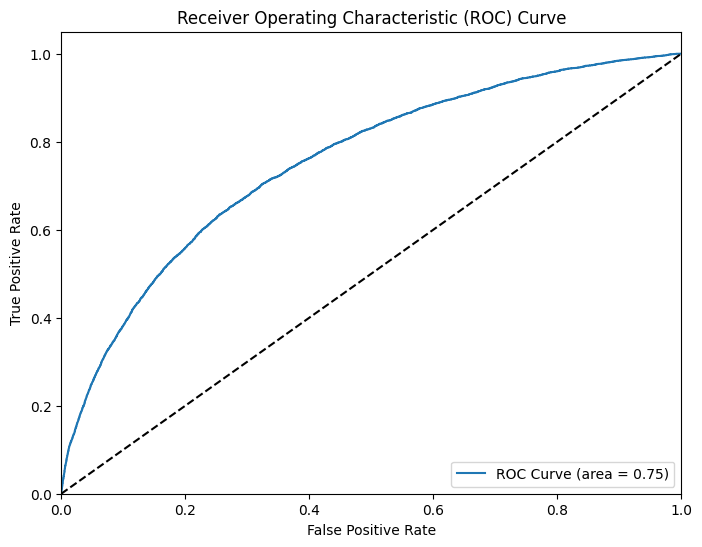

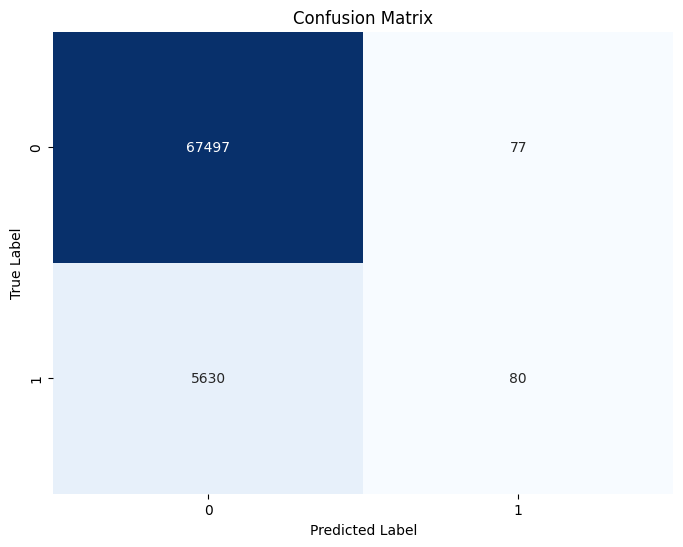

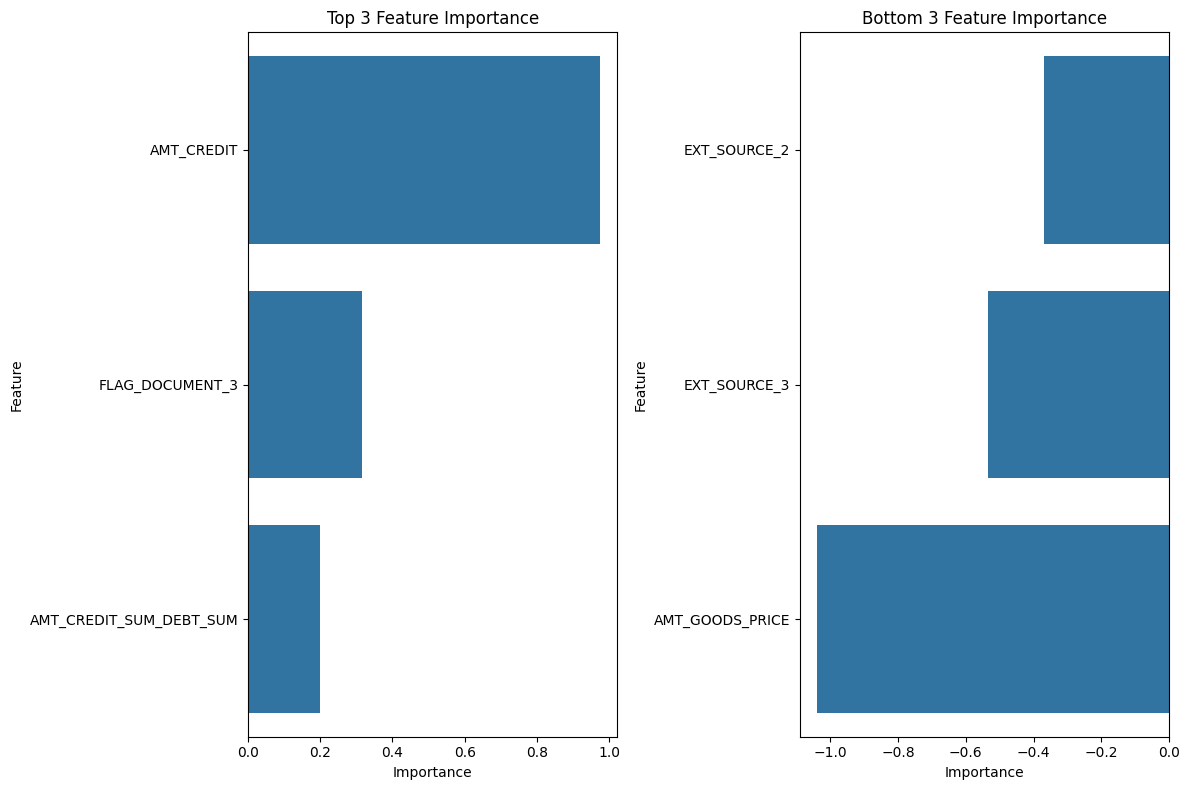

In [6]:
# 로지스틱 회귀
logistic_model = LogisticRegression(max_iter=1000)
run_model_pipeline(logistic_model, FILE_PATH)

## 2. RandomForest

AUC: 0.7272
Accuracy: 0.9221
Precision: 0.7500
Recall: 0.0011
F1 Score: 0.0021


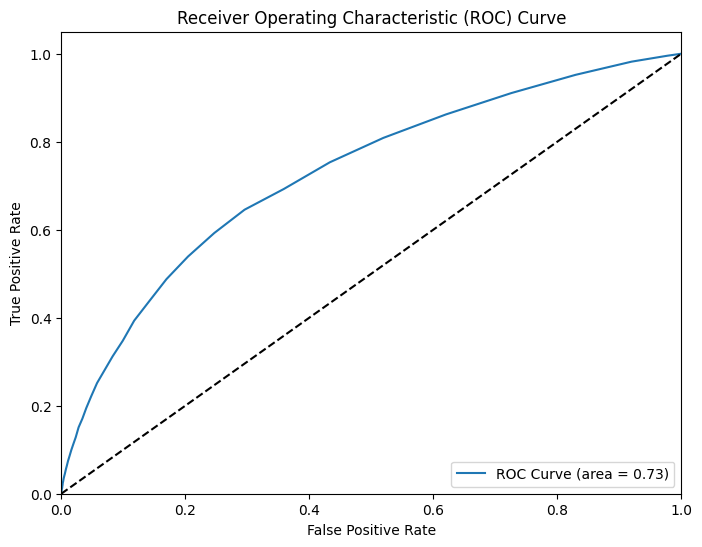

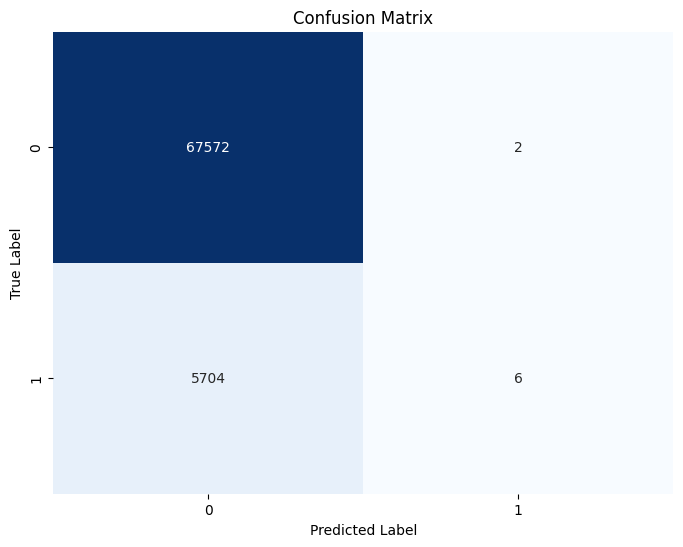

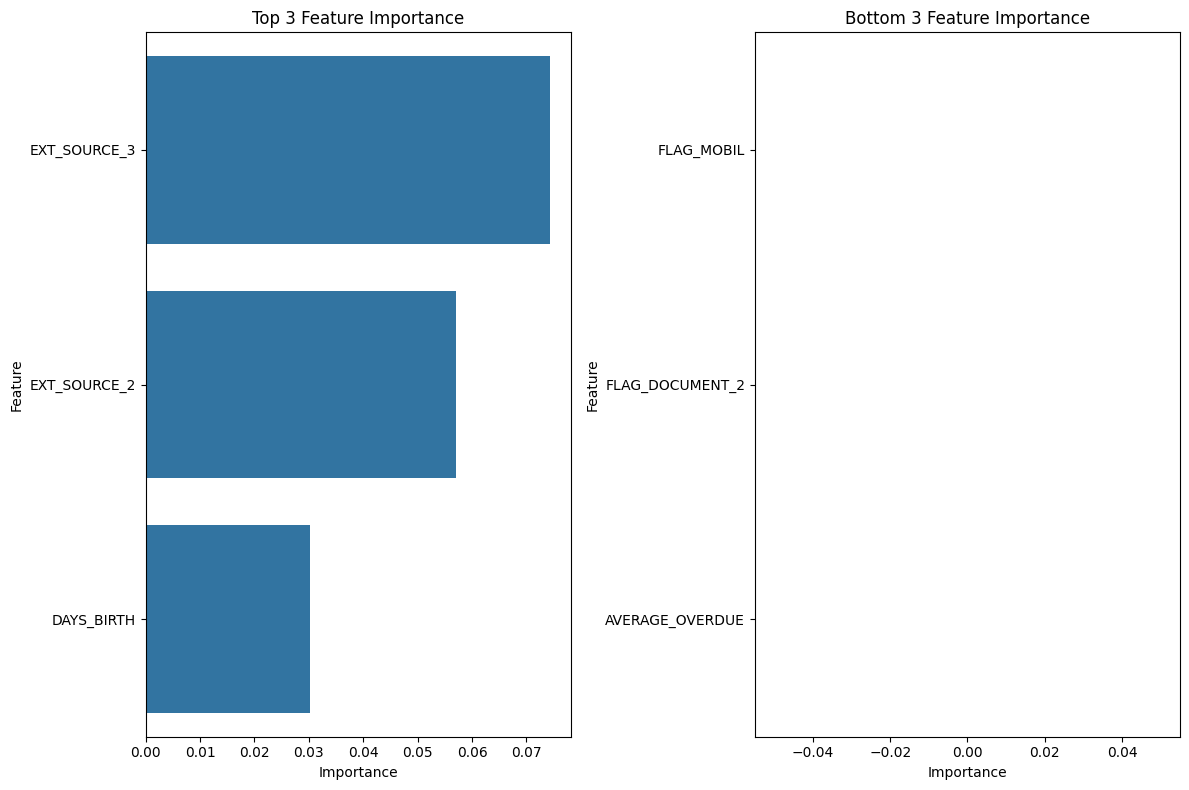

In [7]:
# 랜덤 포레스트
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
run_model_pipeline(rf_model, FILE_PATH)

## 3. XGB

/Users/khb43/anaconda3/envs/semi-project-env/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:54:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AUC: 0.7396
Accuracy: 0.7487
Precision: 0.1744
Recall: 0.5963
F1 Score: 0.2699


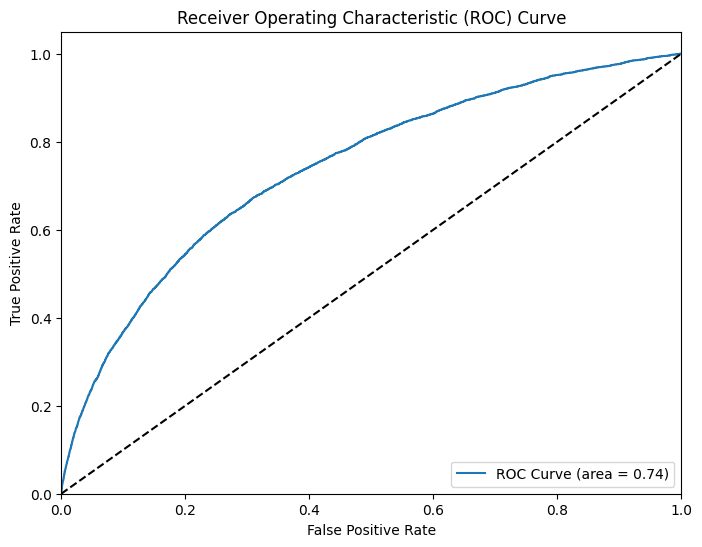

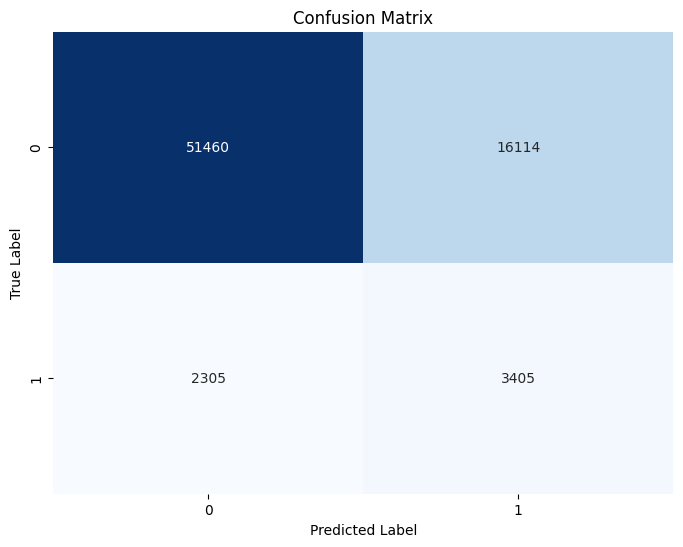

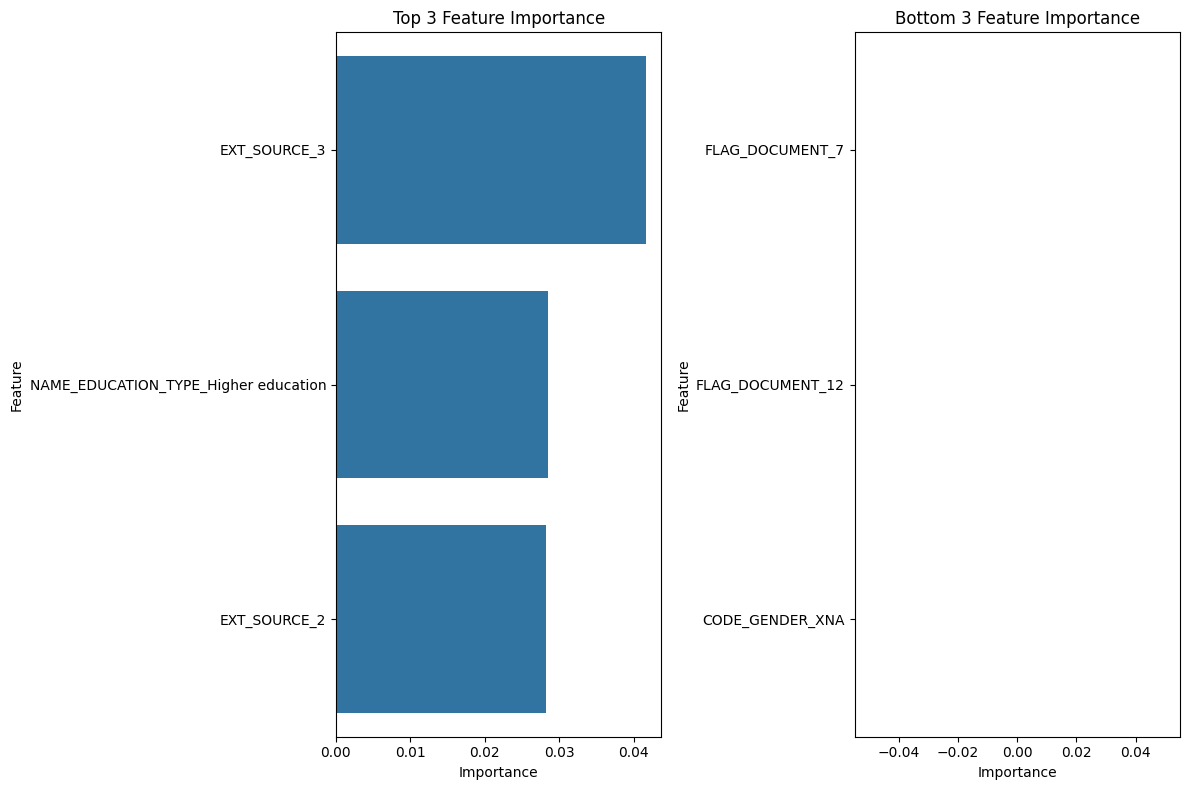

In [8]:
X_train, X_test, y_train, y_test = load_and_split_data(FILE_PATH)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)
scale_pos_weight = len(y_train) / sum(y_train)  # 양성 클래스 비율 계산
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight)

run_model_pipeline(xgb_model, FILE_PATH)


## 4. LGB


[LightGBM] [Info] Number of positive: 13322, number of negative: 157674
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9930
[LightGBM] [Info] Number of data points in the train set: 170996, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
AUC: 0.7639
Accuracy: 0.7217
Precision: 0.1708
Recall: 0.6669
F1 Score: 0.2719


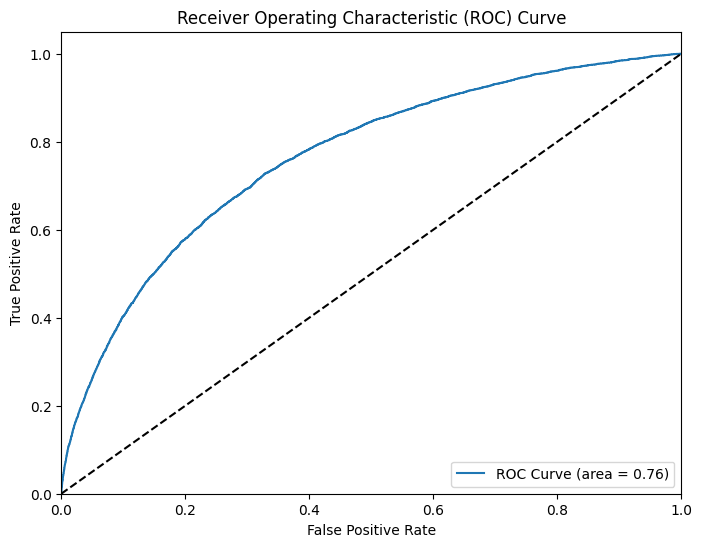

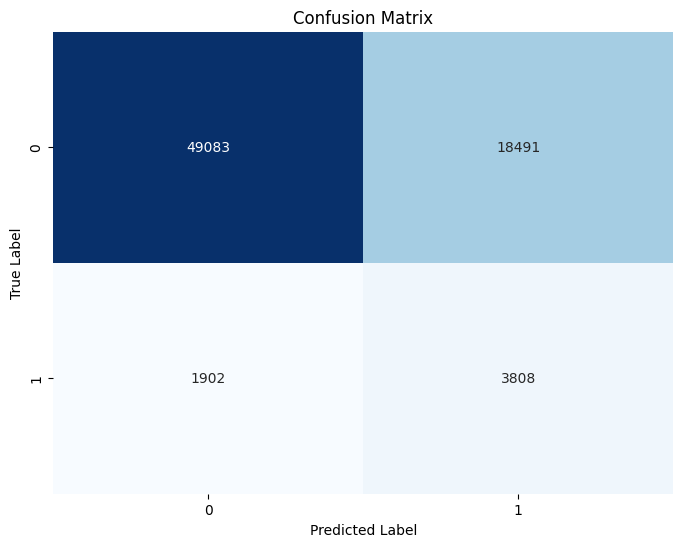

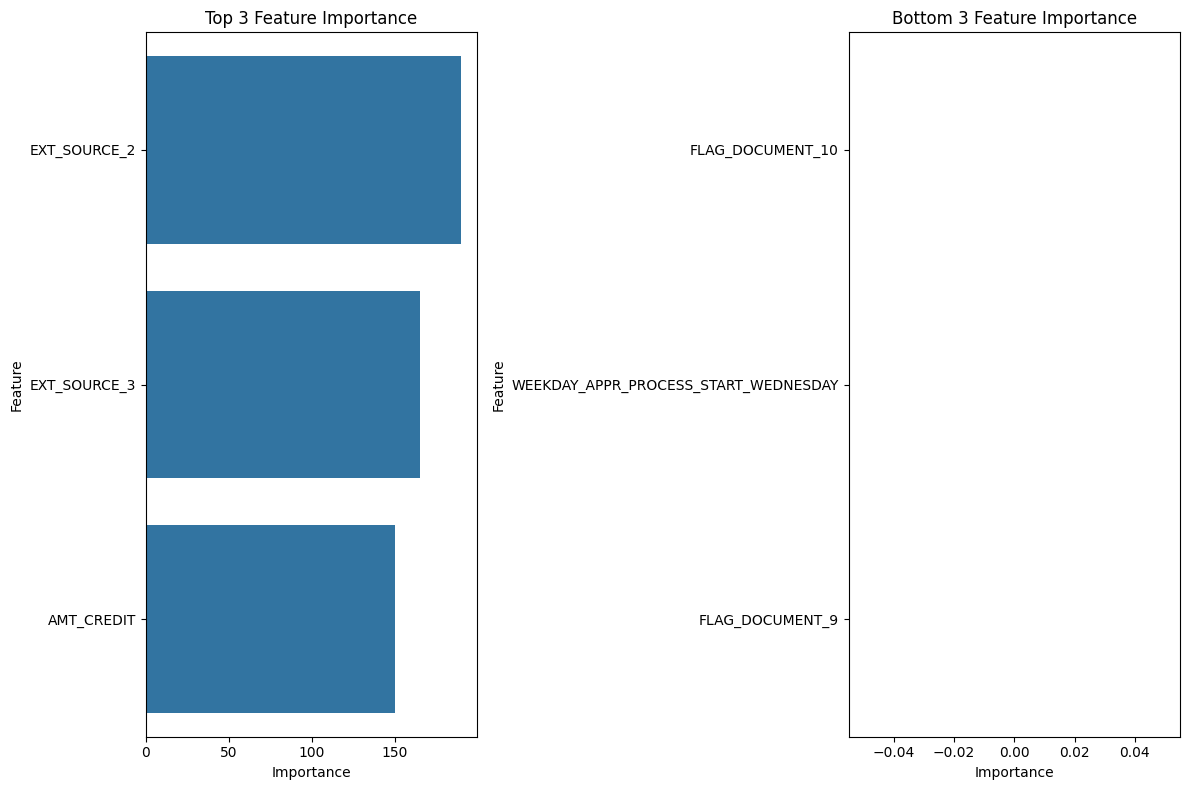

In [9]:
X_train, X_test, y_train, y_test = load_and_split_data(FILE_PATH)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)
lgb_model = LGBMClassifier(class_weight='balanced', random_state=42)

run_model_pipeline(lgb_model, FILE_PATH)

## 5. CatBoost

0:	total: 73.7ms	remaining: 1m 13s
100:	total: 1.59s	remaining: 14.2s
200:	total: 3.18s	remaining: 12.6s
300:	total: 4.86s	remaining: 11.3s
400:	total: 6.51s	remaining: 9.73s
500:	total: 8.14s	remaining: 8.11s
600:	total: 9.84s	remaining: 6.53s
700:	total: 11.5s	remaining: 4.92s
800:	total: 13.1s	remaining: 3.26s
900:	total: 14.7s	remaining: 1.61s
999:	total: 16.5s	remaining: 0us
AUC: 0.7546
Accuracy: 0.7636
Precision: 0.1846
Recall: 0.5956
F1 Score: 0.2819


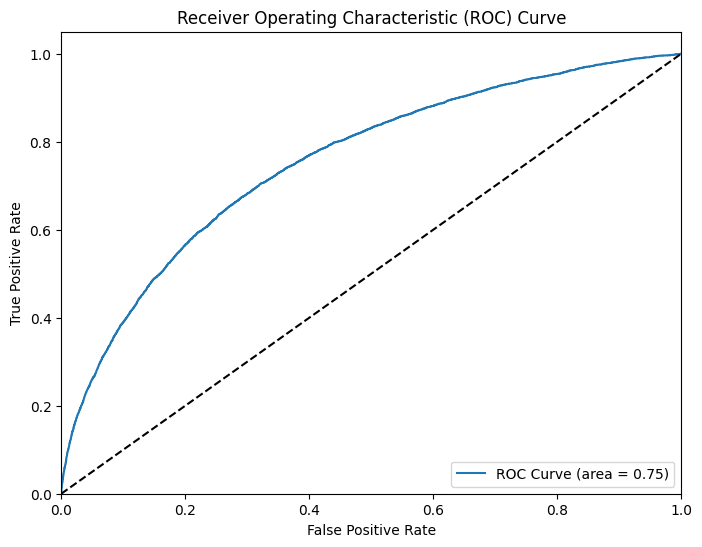

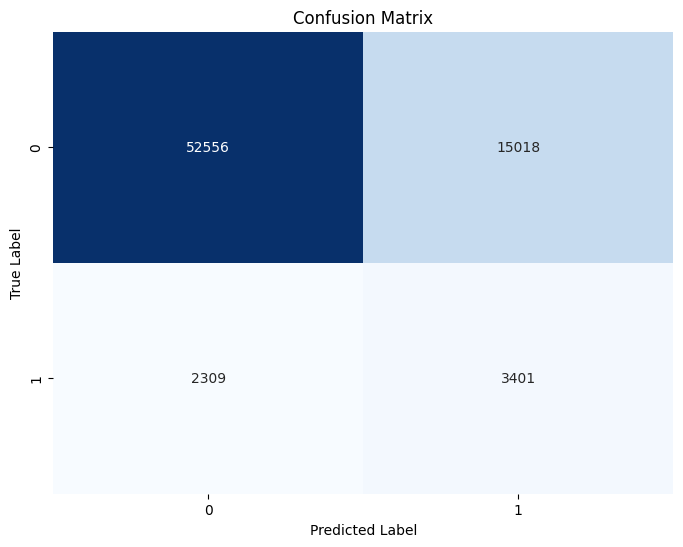

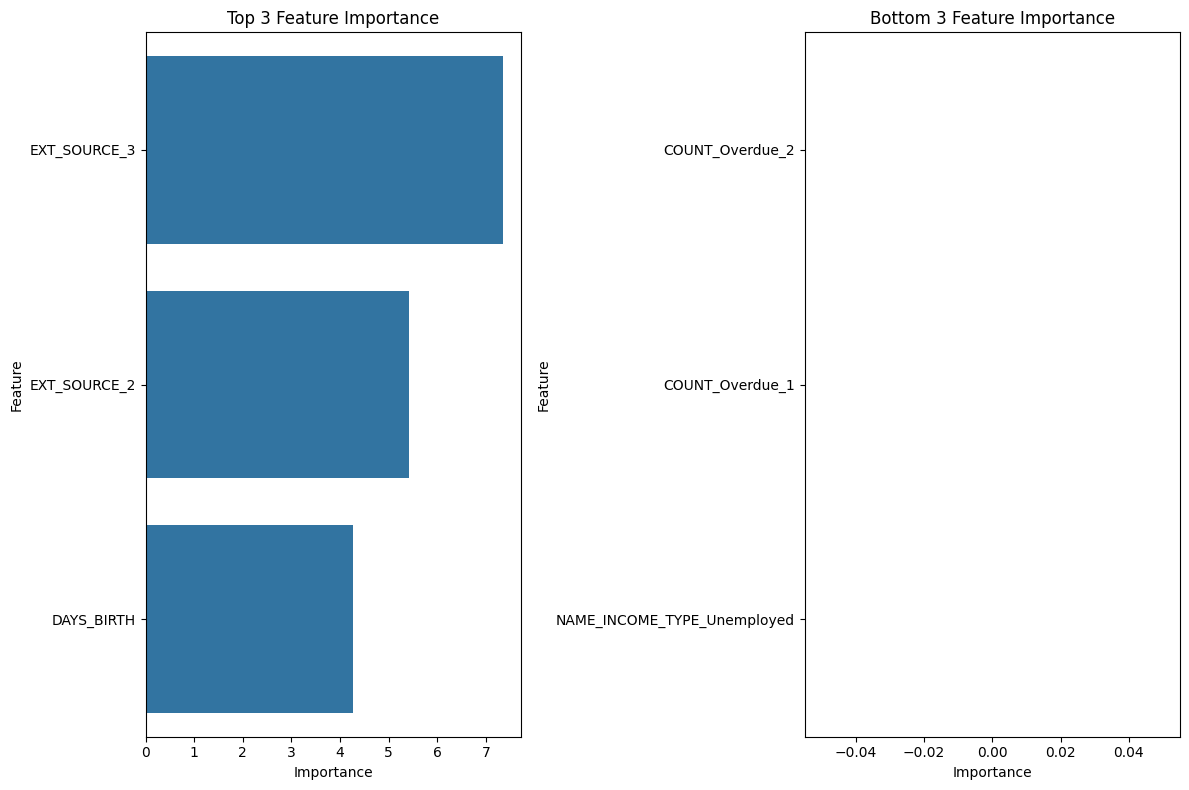

In [10]:
CB_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, 
                        loss_function='Logloss', eval_metric='AUC', 
                        class_weights=[1, len(y_train) / sum(y_train)], 
                        random_state=42, verbose=100) 

run_model_pipeline(CB_model, FILE_PATH)


# 6. MLP

AUC: 0.6875
Accuracy: 0.9098
Precision: 0.2651
Recall: 0.0891
F1 Score: 0.1334


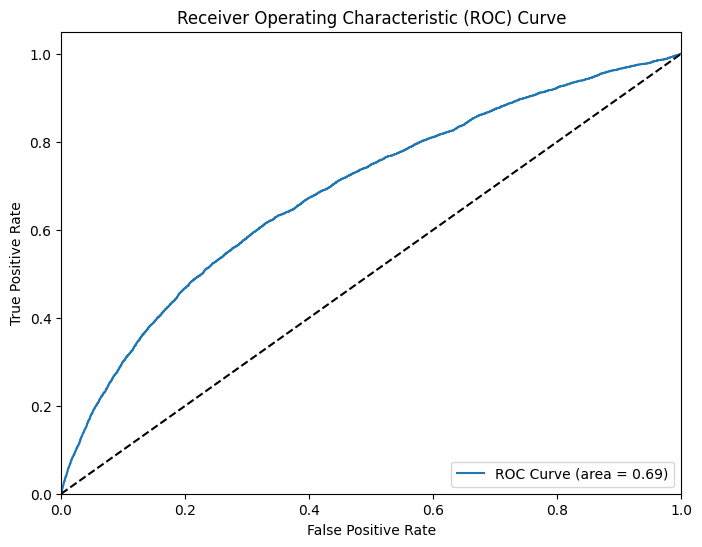

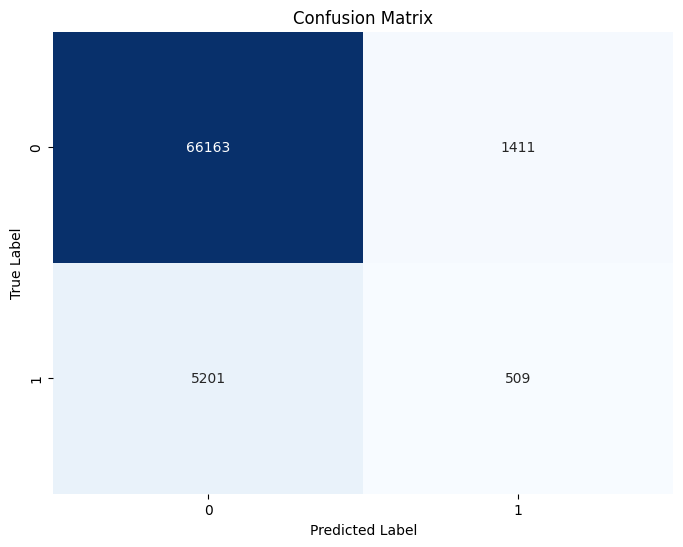

Feature importance is not available for this model.


In [11]:
MLP_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42) 
run_model_pipeline(MLP_model, FILE_PATH)